 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [127]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [128]:
whale_csv_path = Path("../Starter_Code/Resources/whale_returns.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [129]:
# Reading whale return whale_returns.csv")
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [130]:
# Count nulls
whales_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [131]:
# Drop nulls
whales_df.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [132]:
# Reading algorithmic returns
algo_returns = Path("../Starter_Code/Resources/algo_returns.csv")
algoreturns_df = pd.read_csv(algo_returns)
algoreturns_df.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [133]:
# Count nulls
algoreturns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [134]:
# Drop nulls
algo_returns=algoreturns_df.dropna()
algo_returns

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [135]:
# Reading S&P 500 Closing Prices
sp500_history = Path("../Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_history)
sp500.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [136]:
sp500 = Path("Resources/sp500.csv")
sp500 = pd.read_csv(
    whale_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500 = sp500.sort_index()
sp500.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [137]:
# Check Data Types
sp500.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [138]:
# Fix Data Types
sp500["Close"] = sp500["Date"].str.replace("$", "")
sp500["Close"] = sp500["Date"].str.replace(",", "")
sp500["Close"] = sp500["Date"].astype("float")
sp500.dtypes

KeyError: 'Date'

In [ ]:
# Calculate Daily Returns
sp500.isnull().sum()
sp500 = sp500.pct_change()
sp500.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,-1.289988,-1.156012,-1.468984,-1.363449
2015-03-06,-4.706095,-8.287443,1.385337,-5.940478


In [ ]:
# Drop nulls
sp500.dropna

<bound method DataFrame.dropna of            Date     Close
0     23-Apr-19  $2933.68
1     22-Apr-19  $2907.97
2     18-Apr-19  $2905.03
3     17-Apr-19  $2900.45
4     16-Apr-19  $2907.06
...         ...       ...
1644   5-Oct-12  $1460.93
1645   4-Oct-12  $1461.40
1646   3-Oct-12  $1450.99
1647   2-Oct-12  $1445.75
1648   1-Oct-12  $1444.49

[1649 rows x 2 columns]>

In [ ]:
# Rename `Close` Column to be specific to this portfolio.
sp500 = sp500.rename(columns={"Close":"S&P500"})
sp500.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,-1.289988,-1.156012,-1.468984,-1.363449
2015-03-06,-4.706095,-8.287443,1.385337,-5.940478


## Combine Whale, Algorithmic, and S&P 500 Returns

In [ ]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinedreturns = pd.concat([whale_returns,algo_returns, sp500], axis='columns', join='inner')
combinedreturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}>

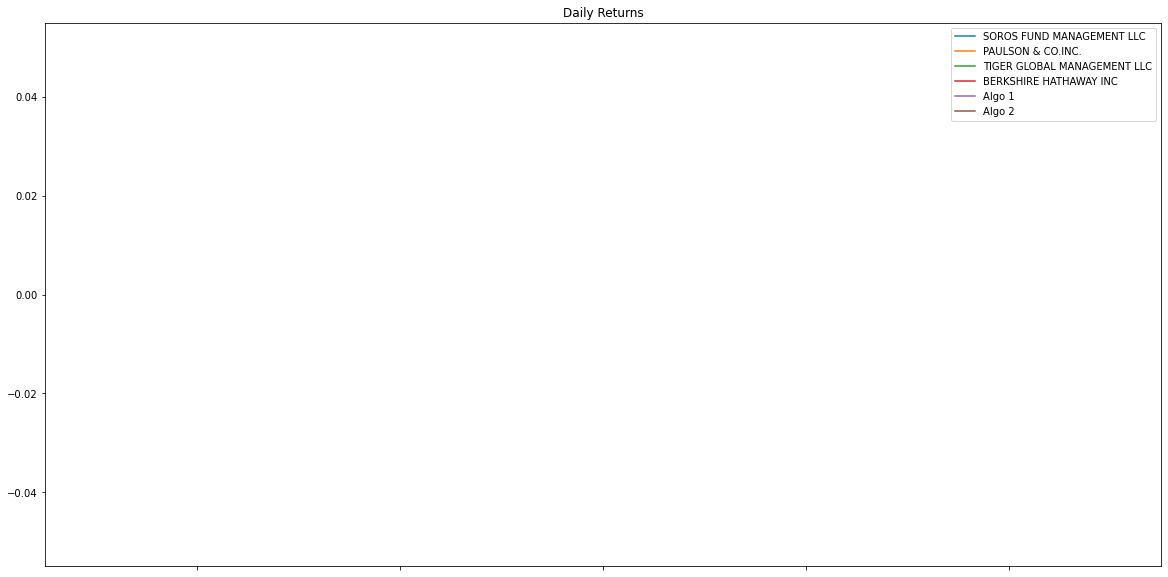

In [ ]:
# Plot daily returns of all portfolios
combinedreturns.plot( title="Daily Returns" , figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:>

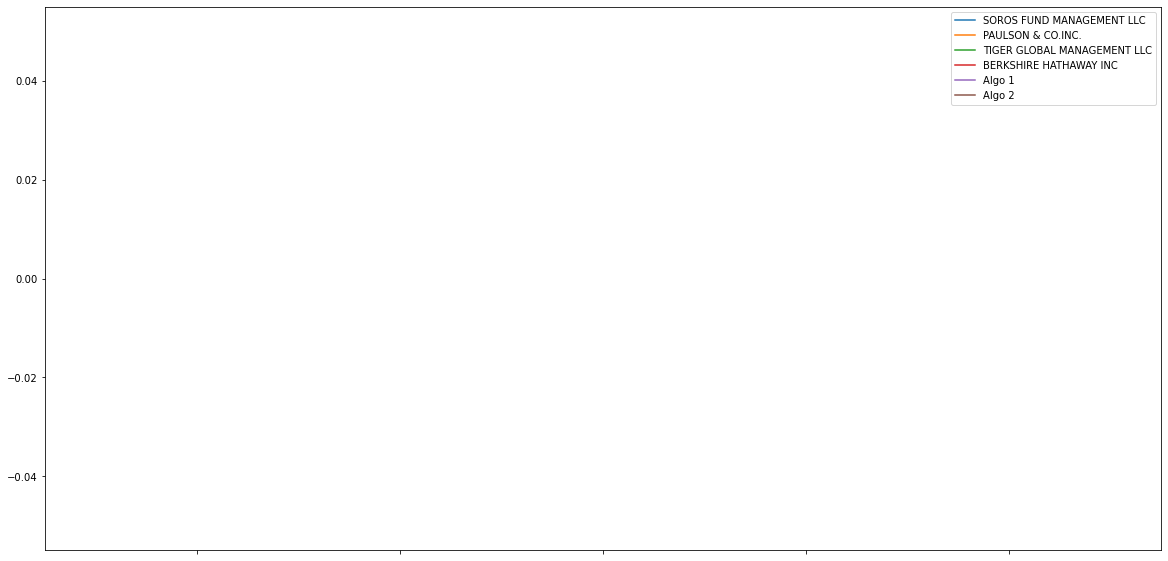

In [ ]:
# Calculate cumulative returns of all portfolios
combined_portfolios_df_cumulative_returns = (1 + combinedreturns).cumprod()
combined_portfolios_df_cumulative_returns.head()
combined_portfolios_df_cumulative_returns.plot(figsize=(20,10))
# Plot cumulative returns


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

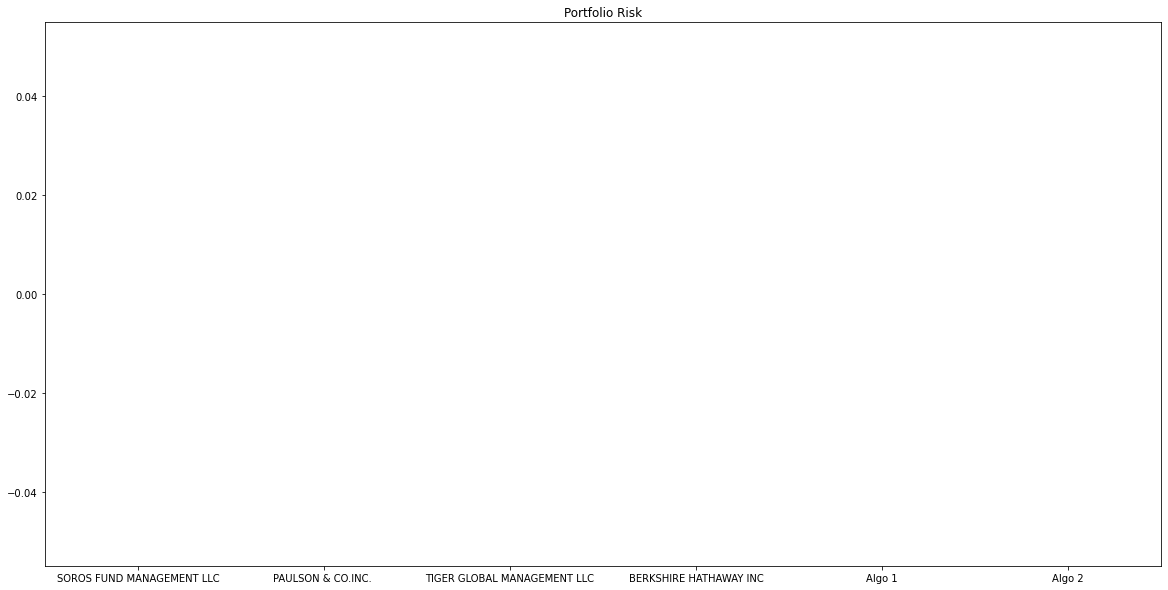

In [ ]:
# Box plot to visually show risk
combinedreturns.plot.box(title= "Portfolio Risk", figsize=(20,10))

### Calculate Standard Deviations

In [ ]:
# Calculate the daily standard deviations of all portfolios
daily_std = combinedreturns.std().sort_values(ascending=False)
combinedreturns.dropna
daily_std

SOROS FUND MANAGEMENT LLC      NaN
PAULSON & CO.INC.              NaN
TIGER GLOBAL MANAGEMENT LLC    NaN
BERKSHIRE HATHAWAY INC         NaN
Date                           NaN
Algo 1                         NaN
Algo 2                         NaN
Date                           NaN
S&P500                         NaN
dtype: object

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

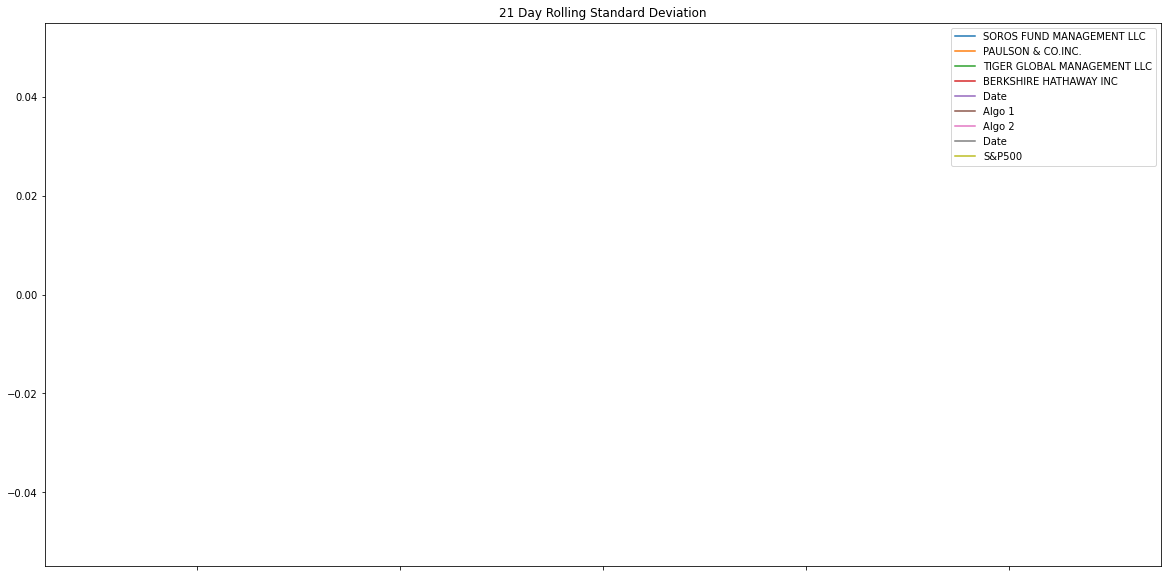

In [ ]:
# Calculate  the daily standard deviation of S&P 500
combinedreturns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))
# Determine which portfolios are riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std *np.sqrt(252)
annualized_std.sort_values(ascending=False)

SOROS FUND MANAGEMENT LLC      NaN
PAULSON & CO.INC.              NaN
TIGER GLOBAL MANAGEMENT LLC    NaN
BERKSHIRE HATHAWAY INC         NaN
Date                           NaN
Algo 1                         NaN
Algo 2                         NaN
Date                           NaN
S&P500                         NaN
dtype: object

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

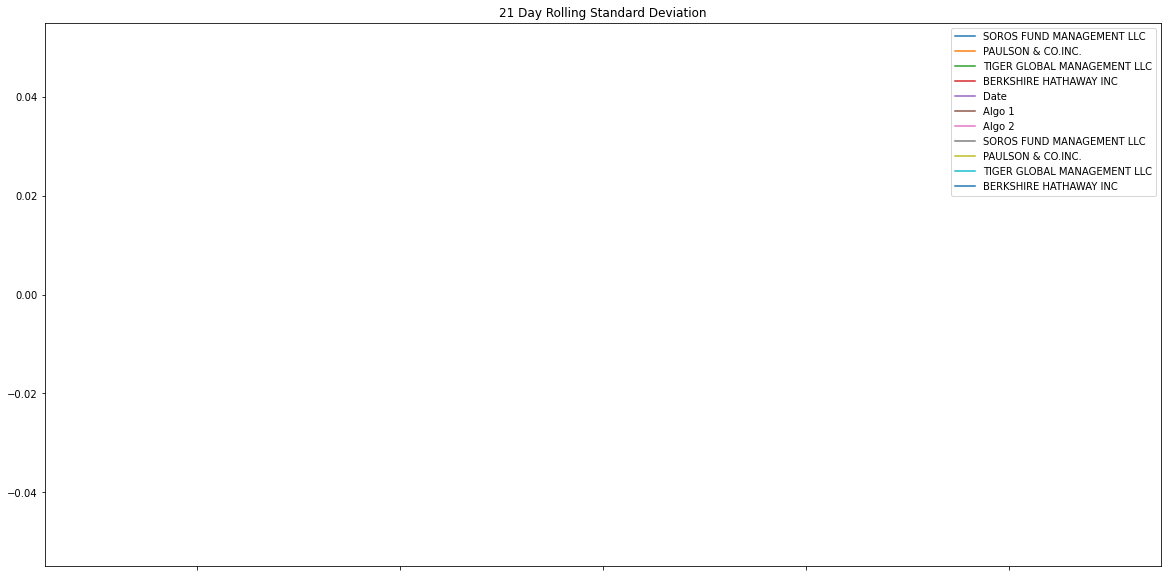

In [140]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
combinedreturns.rolling(window=21).std().plot(title="21 Day Rolling Standard Deviation", figsize=(20,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [142]:
# Calculate the correlation
correlation = combinedreturns.corr()
correlation
# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algo 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOROS FUND MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PAULSON & CO.INC.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIGER GLOBAL MANAGEMENT LLC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BERKSHIRE HATHAWAY INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

KeyError: 'SP&500'

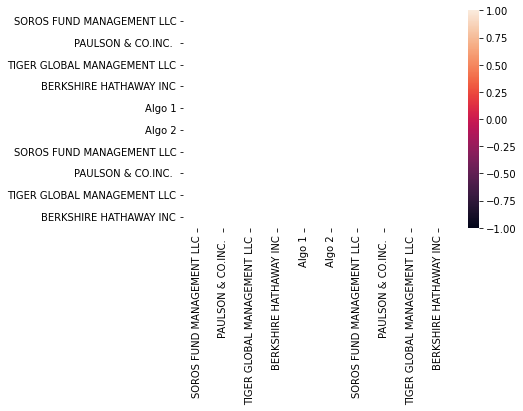

In [151]:
# Calculate covariance of a single portfolio
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)
algo_2_covariance = combinedreturns['Algo 2'].rolling(window=60).cov(combinedreturns['SP&500'])
algo_2_covariance
# Calculate variance of S&P 500
variance = combinedreturns['S&P500'].rolling(window=60).var()
variance
# Computing beta
algo_2_beta = algo_2_covariance / variance

# Plot beta trend
algo_2_beta_plot = algo_2_beta.plot(title="Algo 2 Beta", figsize=(20, 10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentialy Weighted Average'}>

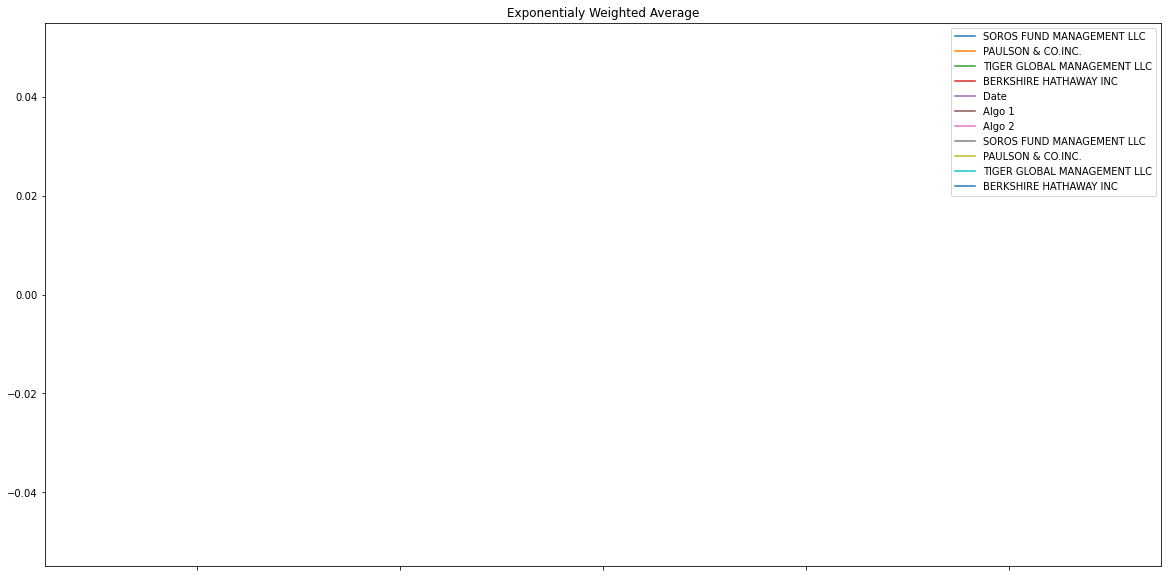

In [153]:
# Use `ewm` to calculate the rolling window
rolling_window_ewma = combinedreturns.ewm(halflife=21, adjust=True).std().plot(title="Exponentialy Weighted Average", figsize=(20, 10))
rolling_window_ewma

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [154]:
# Annualized Sharpe Ratios
sharpe_ratios = (combinedreturns.mean() * 252) / (combinedreturns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      NaN
PAULSON & CO.INC.              NaN
TIGER GLOBAL MANAGEMENT LLC    NaN
BERKSHIRE HATHAWAY INC         NaN
Date                           NaN
Algo 1                         NaN
Algo 2                         NaN
SOROS FUND MANAGEMENT LLC      NaN
PAULSON & CO.INC.              NaN
TIGER GLOBAL MANAGEMENT LLC    NaN
BERKSHIRE HATHAWAY INC         NaN
dtype: object

<AxesSubplot:title={'center':'Sharpe Ratios'}>

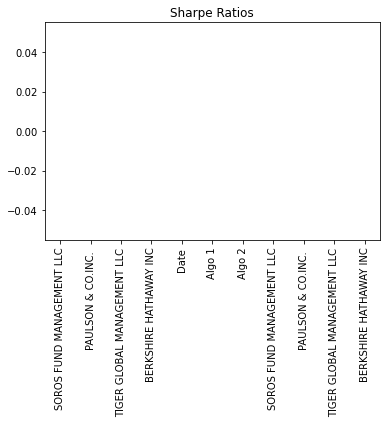

In [155]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [156]:
# Reading data from 1st stock


FileNotFoundError: [Errno 2] No such file or directory: 'Resources/amd.csv'

In [157]:
# Reading data from 2nd stock


FileNotFoundError: [Errno 2] No such file or directory: 'Resources/netflix.csv'

In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!